# Import libraries

### Pandas
### Numpy
### Seaborn
## Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV File 

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\Elevento\Walmart forecasting\walmart_sales.csv")

# Explore the Data

In [3]:
df.head()

,Store,Dept,Date,Monthly_Sales,IsHoliday
0,1,1,2021-01-01,17795,False
1,1,1,2021-02-01,2860,False
2,1,1,2021-03-01,7390,False
3,1,1,2021-04-01,13964,False
4,1,1,2021-05-01,13284,False


# Check the total number of Rows and Columns

In [4]:
df.shape

(1800, 5)

# Check the Null Values

In [5]:
df.isnull().sum()

Store            0
Dept             0
Date             0
Monthly_Sales    0
IsHoliday        0
dtype: int64

# Check Inofrmation about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          1800 non-null   int64 
 1   Dept           1800 non-null   int64 
 2   Date           1800 non-null   object
 3   Monthly_Sales  1800 non-null   int64 
 4   IsHoliday      1800 non-null   bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 58.1+ KB


# Check the Stastistical Summary of the data

In [7]:
df.describe()

,Store,Dept,Monthly_Sales
count,1800.000000,1800.00000,1800.000000
mean,3.000000,5.50000,10914.942222
std,1.414607,2.87308,5180.201031
min,1.000000,1.00000,2009.000000
25%,2.000000,3.00000,6532.000000
50%,3.000000,5.50000,10793.500000
75%,4.000000,8.00000,15396.000000
max,5.000000,10.00000,19988.000000


# Check the duplicate values in data

In [8]:
df.duplicated().sum()

np.int64(0)

 # Convert Date column to datetime |  Aggregate monthly sales

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby('Date')['Monthly_Sales'].sum()

# Aggregate monthly sales

In [10]:
monthly_sales = df.groupby('Date')['Monthly_Sales'].sum()

# Plot the  Aggregate monthly sales

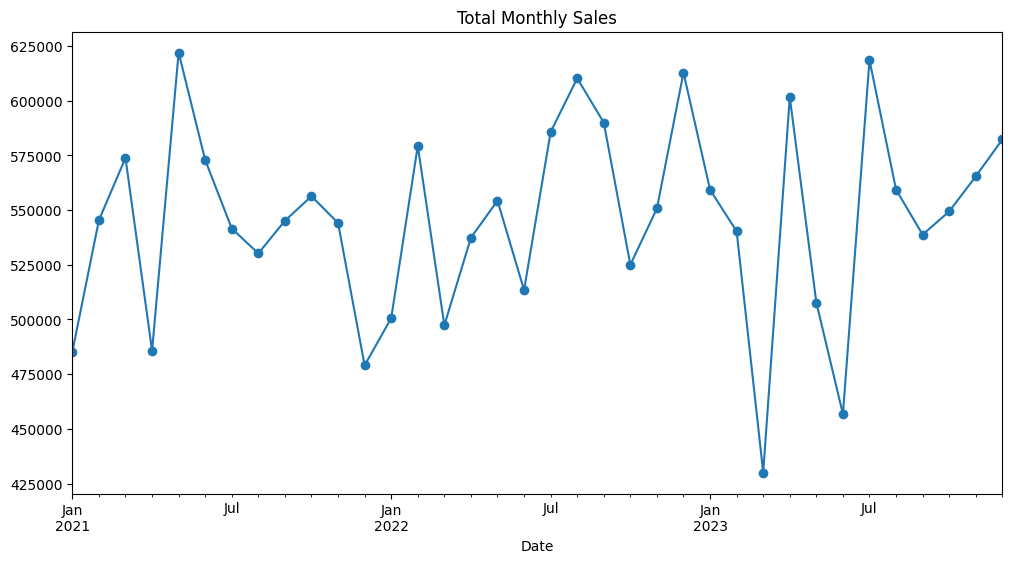

In [11]:
monthly_sales.plot(figsize=(12,6), title="Total Monthly Sales", marker='o')
plt.show()

# Moving average

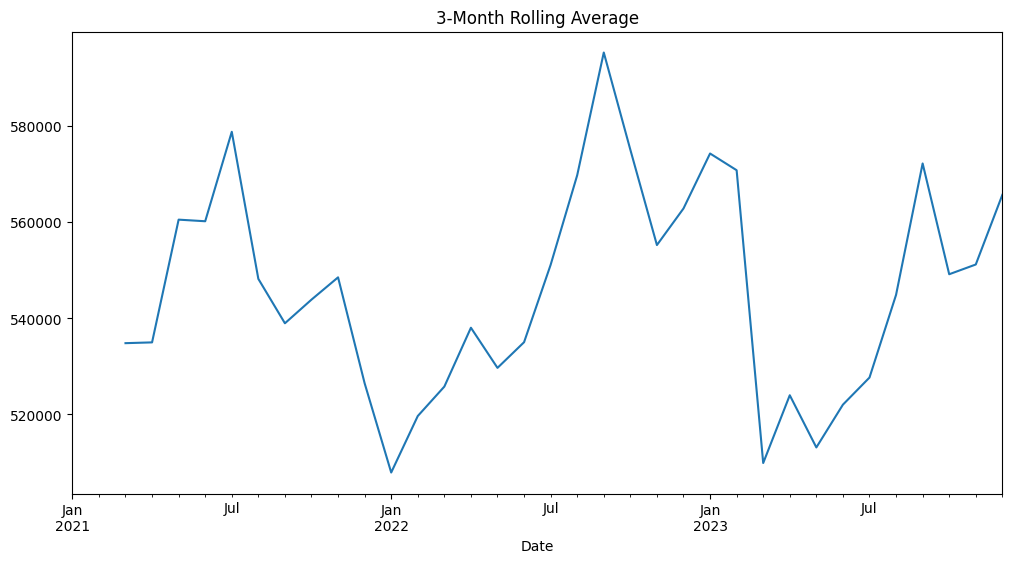

In [22]:
monthly_sales.rolling(window=3).mean().plot(figsize=(12,6), title="3-Month Rolling Average")
plt.show()

# Seasonal decomposition (simplified visualization)

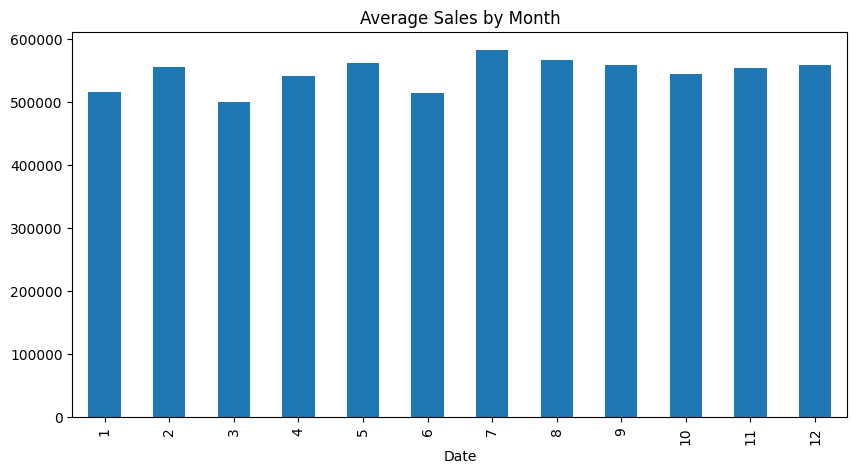

In [13]:
monthly_sales.groupby(monthly_sales.index.month).mean().plot(kind='bar', figsize=(10,5), title="Average Sales by Month")
plt.show()


# Revenue by Store

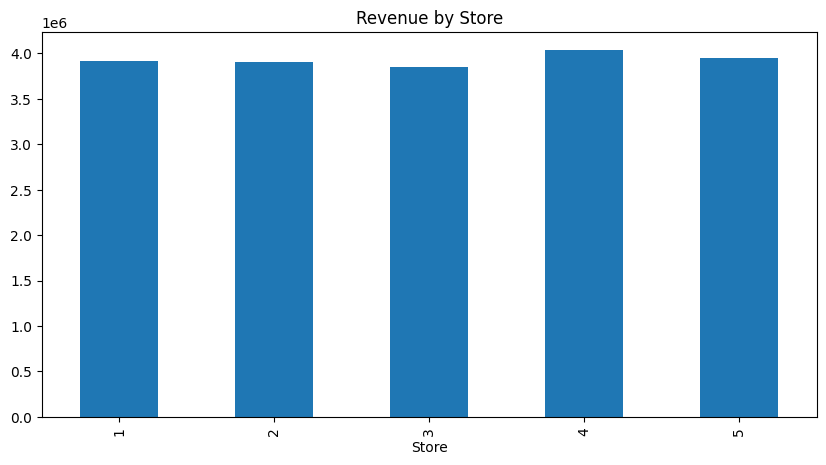

In [14]:
df.groupby('Store')['Monthly_Sales'].sum().plot(kind='bar', figsize=(10,5), title="Revenue by Store")
plt.show()

# Revenue by Department

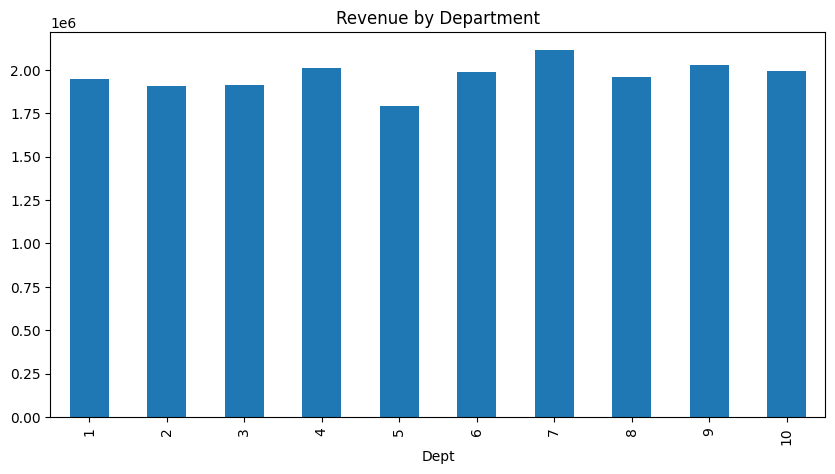

In [15]:
df.groupby('Dept')['Monthly_Sales'].sum().plot(kind='bar', figsize=(10,5), title="Revenue by Department")
plt.show()

# Import the ExponentialSmoothing Model

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model

In [18]:
model = ExponentialSmoothing(monthly_sales, seasonal='add', seasonal_periods=12)
fit = model.fit()

C:\Users\zabiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Forecast next 12 months

In [19]:
forecast = fit.forecast(12)

# Assign proper datetime index to forecast

In [20]:
forecast.index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1),periods=12, freq='MS')

# Plot

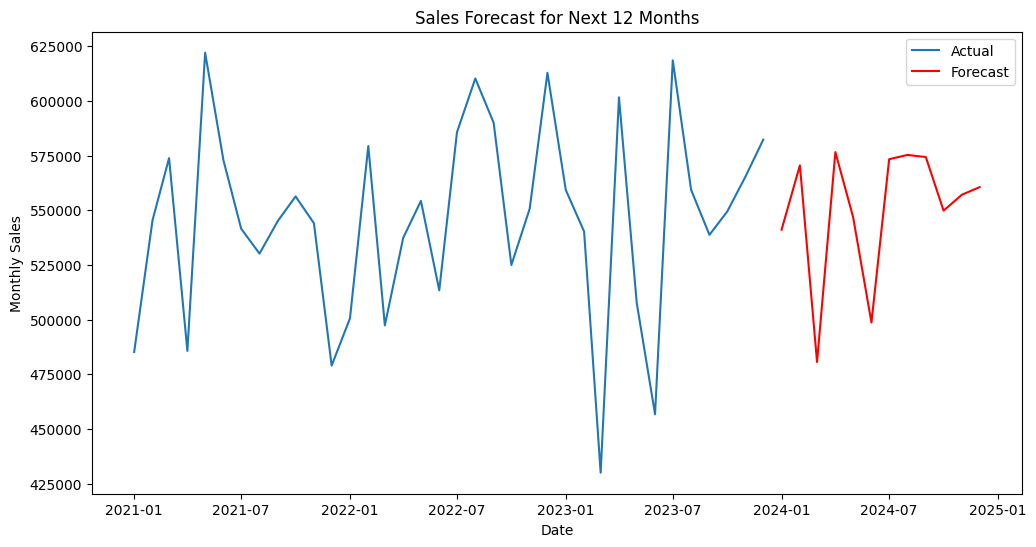

In [21]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title("Sales Forecast for Next 12 Months")
plt.xlabel("Date")
plt.ylabel("Monthly Sales")
plt.legend()
plt.show()

## 📊 Conclusion: Walmart Sales Analysis

The analysis of Walmart's sales data provided key insights into customer purchasing behavior and business performance:

- **Seasonality & Trends:** Sales showed clear seasonal fluctuations, with peaks during holiday seasons and weekends. This suggests strong customer demand during festive periods.
- **Top-Performing Categories:** Certain product categories consistently outperformed others, highlighting areas to prioritize for promotions and inventory planning.
- **Regional Variations:** Sales performance varied across regions, indicating opportunities to optimize localized marketing and supply chain strategies.
- **Impact of Discounts:** Discounts and promotions had a significant positive impact on driving short-term sales but should be carefully balanced with profit margins.
- **Forecasting Potential:** Time series modeling can further help predict demand, ensuring better stock management and reducing overstock or stockouts.

### ✅ Key Recommendations:
1. Increase inventory and marketing efforts during **holiday and seasonal peaks**.
2. Focus on **high-performing categories** with targeted promotions.
3. Develop **regional strategies** to maximize sales in underperforming areas.
4. Use **predictive models** to anticipate demand and optimize supply chain operations.

---

🔍 This analysis demonstrates how data-driven insights can empower decision-making in the retail sector, enhancing efficiency and profitability.
